<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [13]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [30]:
from bs4 import BeautifulSoup
##### Your Code Here #####
df = pd.read_csv('./data/job_listings.csv')

parsed_data = []
for description in df['description']:
    soup = BeautifulSoup(description, "html.parser")
    parsed_data.append(soup.get_text()[2:-1])

In [31]:
df['desc_parsed'] = parsed_data

In [32]:
df['desc_parsed'] = df['desc_parsed'].str.replace("\\", " ").str.replace(" n ", "")

In [33]:
df = df.drop('Unnamed: 0', axis = 1)

In [34]:
df.head()

,description,title,desc_parsed
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements: nConceptual understanding in...
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job DescriptionnAs a Data Scientist 1, you wil..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA xe2 x80 x93 multiple locations ...


## 2) Use Spacy to tokenize the listings 

In [35]:
##### Your Code Here #####
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [36]:
# Tokenizer Pipe
tokens = []

for doc in tokenizer.pipe(df['desc_parsed'], batch_size=500):
    doc_tokens = []
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [37]:
df['tokens'].head()

0    [job, requirements:, nconceptual, understandin...
1    [job, descriptionnas, data, scientist, 1,, hel...
2    [data, scientist, working, consulting, busines...
3    [$4,969, $6,756, monthcontractunder, general, ...
4    [location:, usa,  , xe2, x80, x93, multiple, l...
Name: tokens, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [52]:
##### Your Code Here #####
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english')

#Learn our Vocab
vect.fit(df['desc_parsed'])

# Get sparse dtm
dtm = vect.transform(df['desc_parsed'])


In [53]:
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.head(10)

,00,000,000npay,02115,03,0356,04,062,06366,08,...,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

C:\Users\Elina\Anaconda3\envs\U4-S1-NLP\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


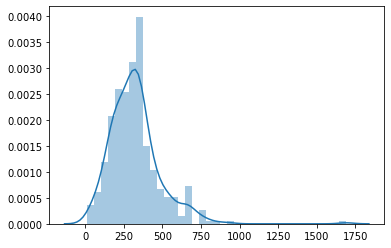

In [54]:
##### Your Code Here #####
import seaborn as sns

word_counts = [len(token) for token in df['tokens']]
sns.distplot(word_counts);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [45]:
##### Your Code Here #####
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english',
                       ngram_range=(1,2),
                       max_df=.95,
                       min_df=4)

#Create a vocabulary and get word counts per document
# Similar to fit_predict
dtm = tfidf.fit_transform(df['desc_parsed'])

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns= tfidf.get_feature_names())

# View Feature Matrix as a DataFrame
dtm.head()

,000,000 employees,04,10,10 time,10 years,100,100 000,100 companies,100 countries,...,years industry,years professional,years related,years relevant,years work,years working,years xe2,yes,york,york city
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [46]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [47]:
dream_job =["""Looking for hard working individual with a love of problem solving.
            Profiecient in Python and SQL. Loves data visualization. Experience with 
            cross-functional teamwork. Bachelors in Mathematics preferred. """]

In [48]:
new = tfidf.transform(dream_job)

In [49]:
nn.kneighbors(new.todense())

(array([[1.3003925 , 1.34977723, 1.34977723, 1.35247543, 1.3542218 ]]),
 array([[140, 198, 205, 295, 184]], dtype=int64))

In [51]:
df['desc_parsed'][140]

"*****Only local candidates will be consider for this role*****nWho we are!nHi, we are Chewse! Hundreds of offices work with us to run their employee meal programs and culture services. On a monthly basis, we serve over 19,000 people. Chewse delivers family-style office meals from the best local restaurants. We take on the burden of planning group meals, so companies large and small can focus on doing great work, with amazing people, on time. We outperform our competition around three core value propositions. 1) Curated Menus, 2) Local Restaurants, and 3) Consistent experience.nWe are a unique little team that is constantly experimenting with the best ways to have a fun, fulfilling, and productive culture. If you want to be part of a team that is paving the way for the Culture as a Service (CaaS) industry, and working on big hairy problems in order to help facilitate authentic human connection, then please reach out to us. The work is not easy, but the positive impact is real. Every da

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 